We are going to predict housing price, the features are variables related to a house and the label will be the price.
We want to see if we can predict housing price with linear regression, the features consist of a bunch of float values.

Import libraries, we are going to acquire the dataset from the sklearn library.

In [2]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import datasets as ds

import matplotlib.pyplot as plt

In [3]:
# Acquire dataset
X, y = ds.load_boston(return_X_y=True)

/home/baz/PycharmProjects/log/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

In [4]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In our case there is no real need for data cleaning, there are not any categorical values.

Let's try to visualize the relations in the data by plotting a scatter matrix first.

array([[<AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='AGE', ylabel='ZN'>,
        <AxesSubplot:xlabel='DIS', ylabel='ZN'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='ZN'>,
        <AxesSubplot:xlabel='TAX', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='B1000', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>],
       [<AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel=

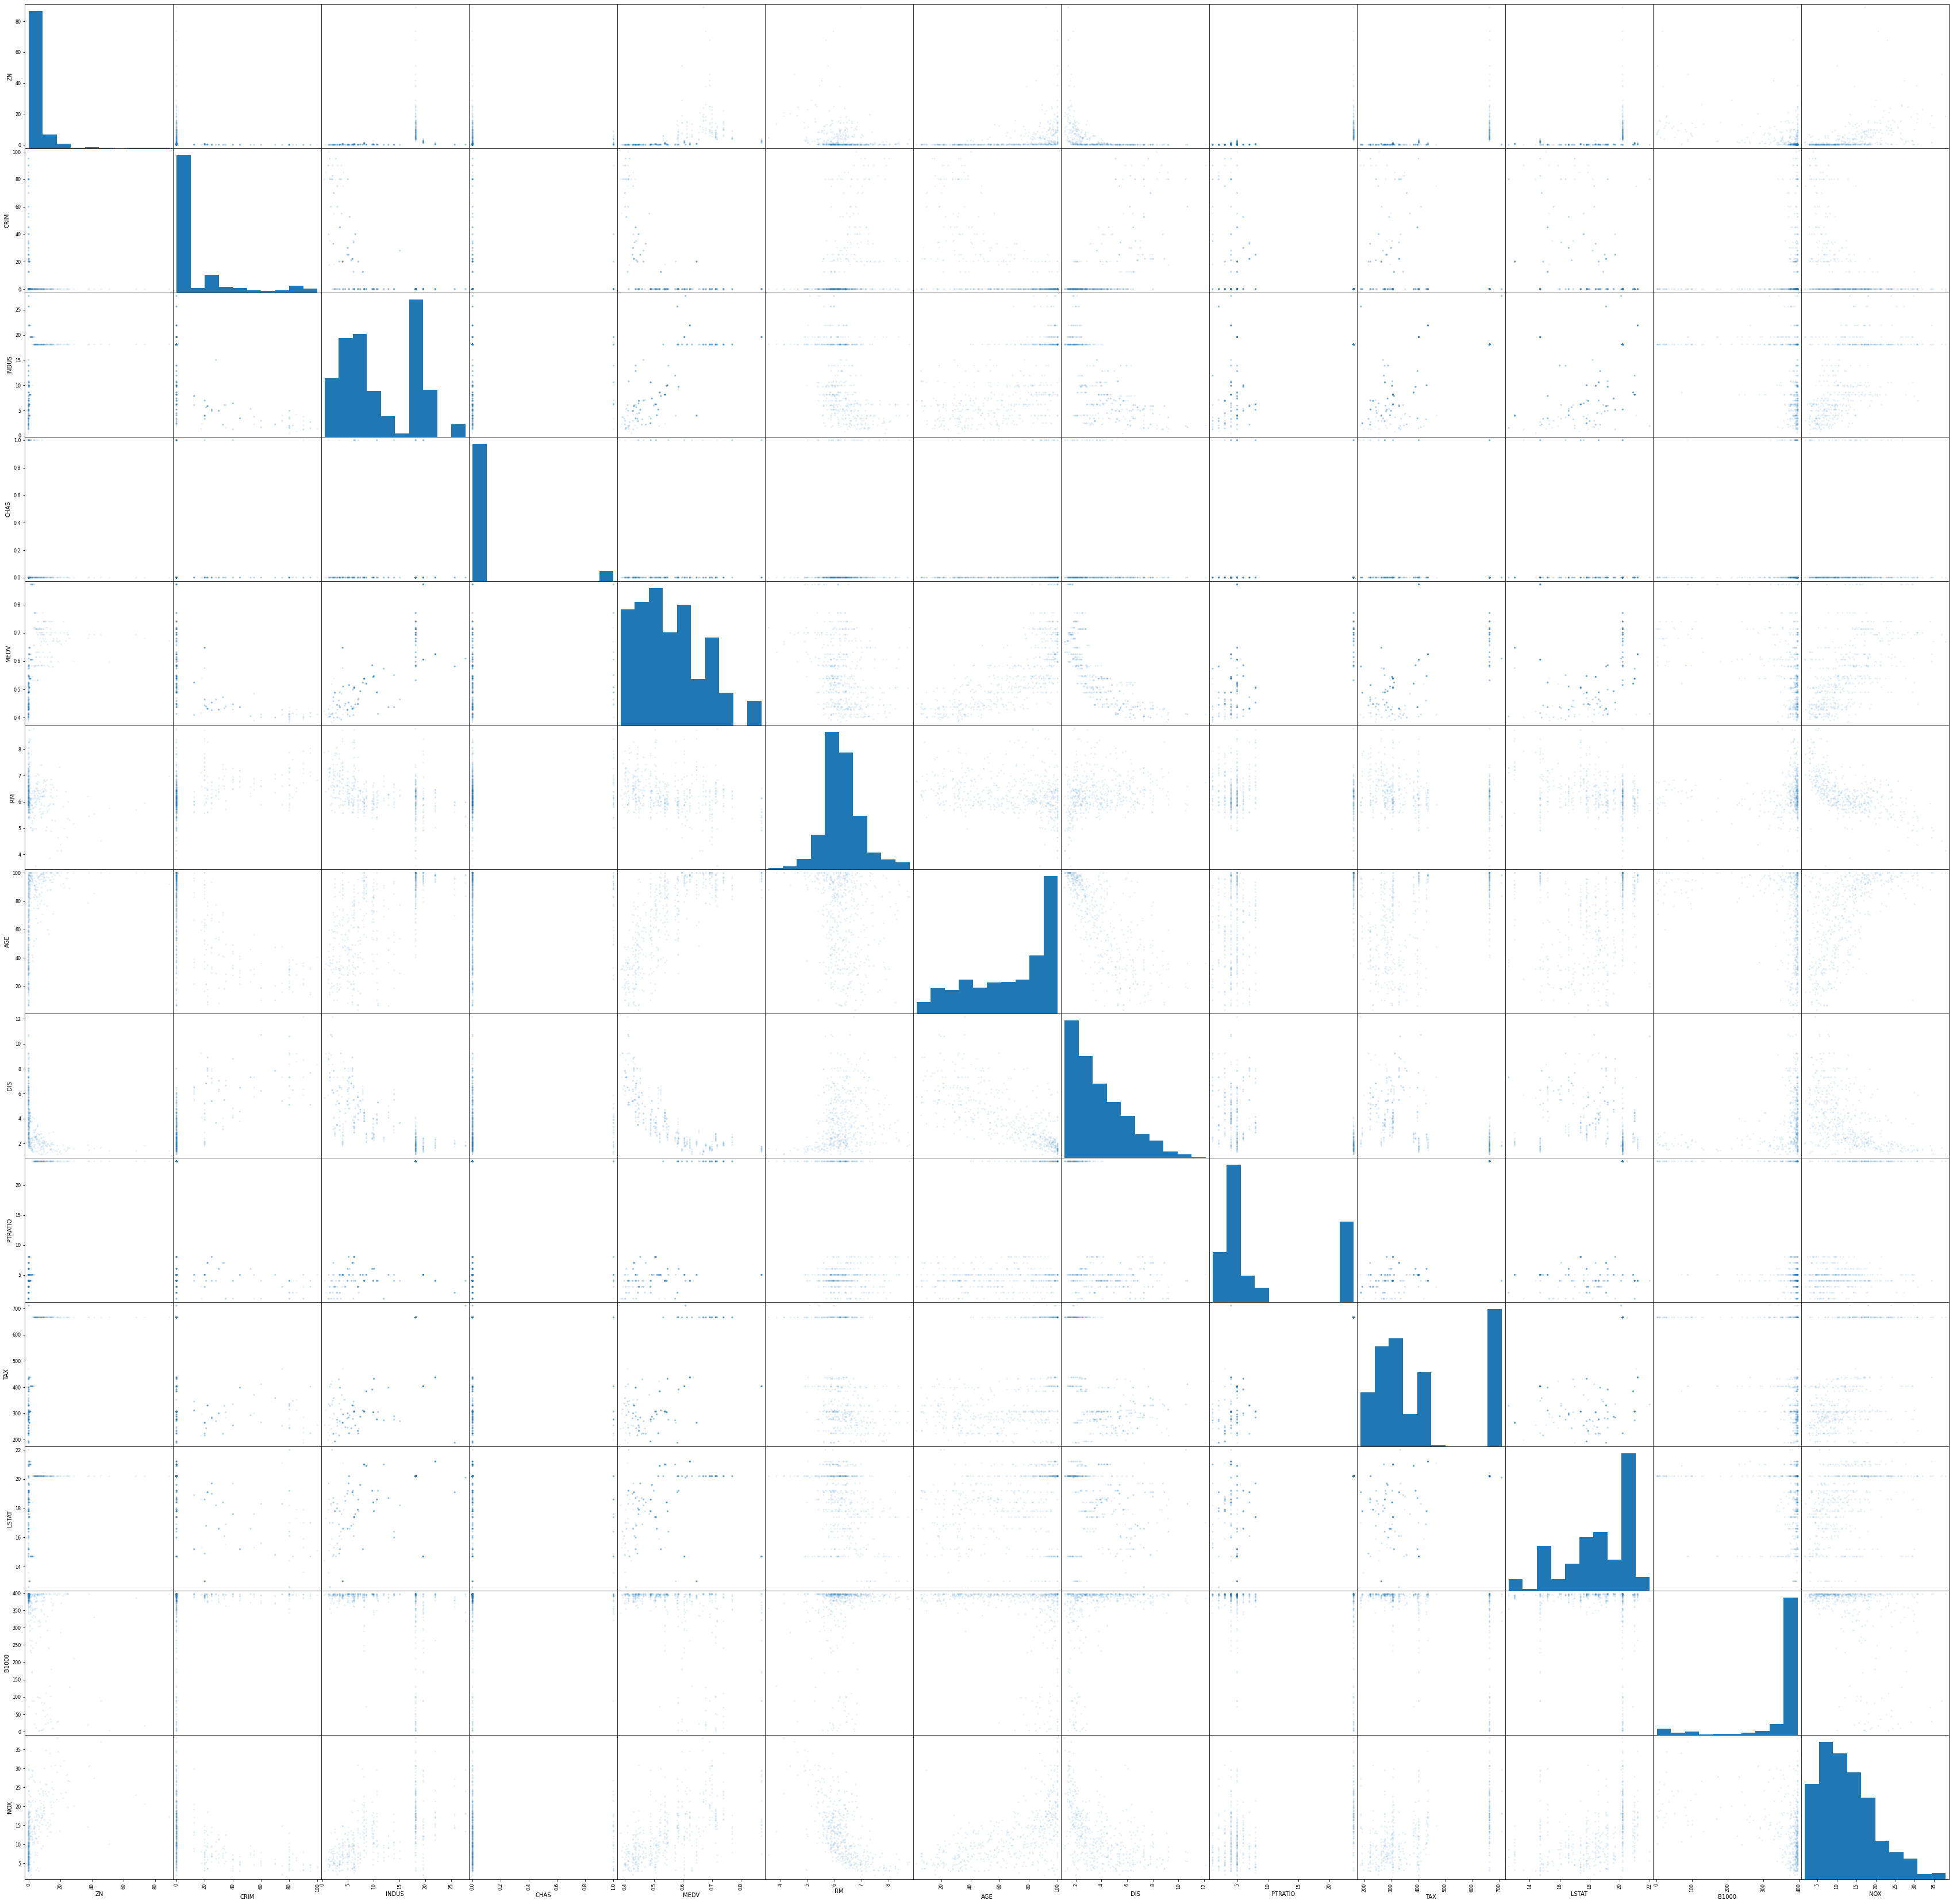

In [5]:
data = pd.DataFrame(X, columns=['ZN','CRIM','INDUS','CHAS','MEDV','RM','AGE','DIS','PTRATIO','TAX','LSTAT','B1000','NOX'])

pd.plotting.scatter_matrix(data, alpha=0.1, figsize=(60,60))

Training the model and analysis

In [7]:
# Define the regression model
LR = LinearRegression()
# Fit the training data
LR.fit(X, y)

# Predict the test set
y_prediction= LR.predict(X)

print('R2:', metrics.r2_score(y , y_prediction))

print('Adj R2:', 1 - (1-metrics.r2_score(y , y_prediction))*(len(y)-1)/(len(y)-X.shape[1]-1))

print('Mean squared error:',  metrics.mean_squared_error(y , y_prediction))

print('Root Mean squared error:', np.sqrt(metrics.mean_squared_error(y , y_prediction)))

print('Mean Absolute error:', metrics.mean_absolute_error(y, y_prediction))

print('average price', sum(y)/len(y))

R2: 0.7406426641094094
Adj R2: 0.7337897263724629
Mean squared error: 21.894831181729206
Root Mean squared error: 4.679191295697282
Mean Absolute error: 3.2708628109003146
average price 22.532806324110698


## Explaination

R2 is the linear relation between Y and X, for the predictability. This can be a value between 0 and 1, A score of 0.73 tells us that about ~ 3 quarters of the dataset is predictable by changes in the index, higher is beter.


Mean Absolute Error: Avg magnitude of errors in  the predictions. Value can range from 0 to ∞ . It is the difference between the true and the measured value: In this case, our mean absolute error is 3,27. the average household price is 22.53

Visualization

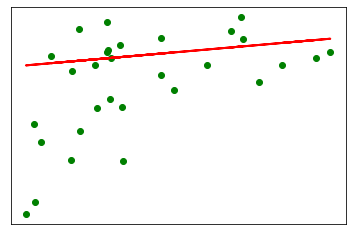

In [13]:
oneX = X[:, np.newaxis, 7]
# Split the data into training/testing sets
# X
feature_X_train = oneX[:-30]
feature_X_test = oneX[-30:]

# Y
feature_y_train = y[:-30]
feature_y_test = y[-30:]

# Fit the feature to Linear Regression model
LR.fit(feature_X_train, feature_y_train)

# predictions test set
y_prediction = LR.predict(feature_X_test)

# Plot graph
plt.scatter(feature_X_test, feature_y_test,  color='Green')
plt.plot(feature_X_test, y_prediction, color='red', linewidth=2)

plt.yticks(())
plt.xticks(())
plt.show()

With one feature, we can see a good few outliers, this explains why RMSE is higher than MAE